Задание: Используя исторические данные в таблице построить модель для выявления фродовых транзакций

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
# read data
df_path = './data/df.csv'
df = pd.read_csv(df_path)

In [3]:
df.sort_values(['relative_timestamp']).head()

,is_fraud,transaction_amount,relative_timestamp,F1,F2,F3,F4,F5,F6,F7,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
273610,0,149.62,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,NaN,NaN
283415,0,2.69,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,NaN,NaN
245396,0,123.50,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.663148,1.367094
20761,0,378.66,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.138857,-0.734544
194346,0,69.99,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.549538,2.938800


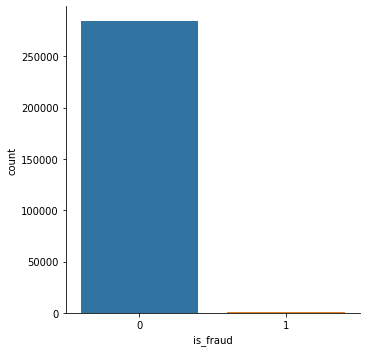

[284315    492]
0.0017


In [4]:
vc = df['is_fraud'].value_counts()
fraud_fraction = round(vc[1]/vc[0],4)

sns.catplot(x='is_fraud', data=df, kind='count')
plt.show()

print(vc.values)
print(fraud_fraction)

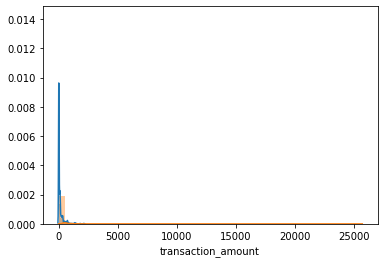

In [5]:
sns.distplot(df['transaction_amount'][df['is_fraud'] == 1])
sns.distplot(df['transaction_amount'][df['is_fraud'] == 0])
plt.show()

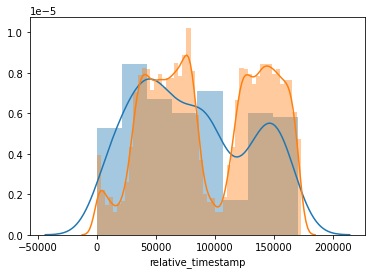

In [6]:
sns.distplot(df['relative_timestamp'][df['is_fraud'] == 1])
sns.distplot(df['relative_timestamp'][df['is_fraud'] == 0])
plt.show()

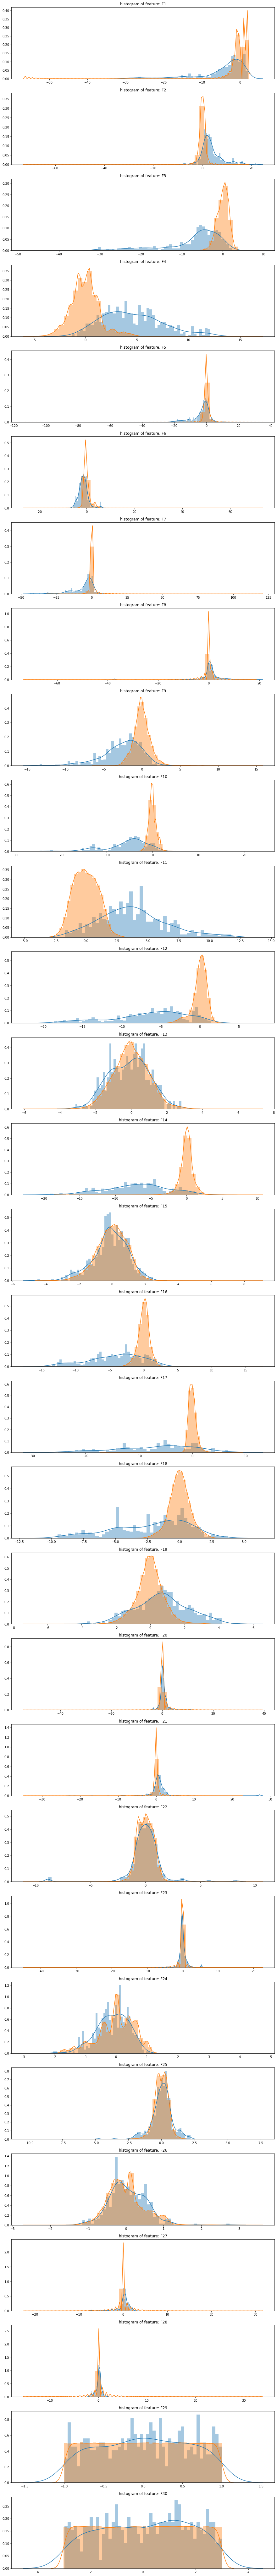

In [7]:
fig, axes = plt.subplots(30, 1, figsize=(15, 5*30))

for i, f in enumerate(df.columns[3:].values):
    sns.distplot(df[f][df['is_fraud'] == 1], bins=50, ax = axes[i])
    sns.distplot(df[f][df['is_fraud'] == 0], bins=50, ax = axes[i])
    axes[i].set_title('histogram of feature: ' + str(f))
    axes[i].set_xlabel('')
    # break
plt.show()

In [8]:
df.describe()

,is_fraud,transaction_amount,relative_timestamp,F1,F2,F3,F4,F5,F6,F7,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,279037.000000,273152.000000
mean,0.001727,88.349619,94813.859575,1.176508e-15,3.384475e-16,-1.400393e-15,2.094253e-15,1.005014e-15,1.495396e-15,-5.633308e-16,...,1.616146e-16,-3.501981e-16,2.631289e-16,4.473216e-15,5.147317e-16,1.685552e-15,-3.658906e-16,-1.217348e-16,0.000234,0.001730
std,0.041527,250.120109,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.577048,1.731792
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.999996,-2.999968
25%,0.000000,5.600000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.498547,-1.504026
50%,0.000000,22.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000744,0.005981
75%,0.000000,77.165000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.498705,1.498579
max,1.000000,25691.160000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,0.999990,2.999969


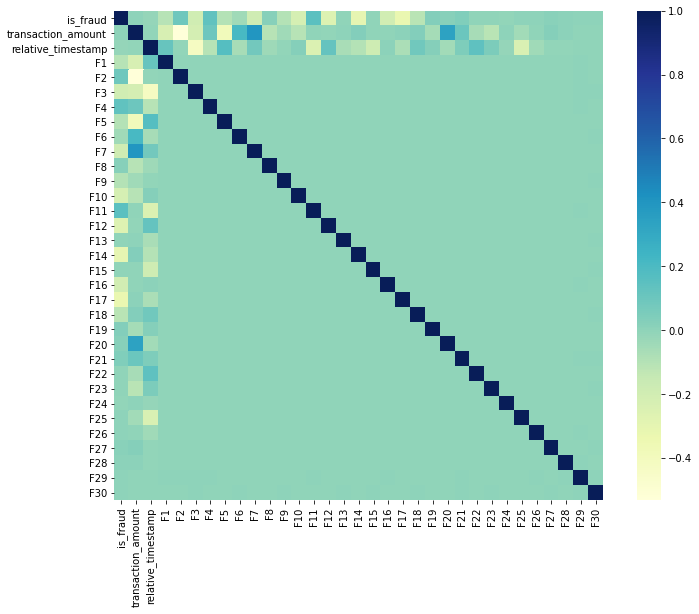

In [9]:
# plot correlation matrix
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, square=True, cmap = 'YlGnBu')
plt.show()

In [10]:
# sample equally distributed subset and check for corr on it
df_1 = df[df['is_fraud']==1]
n_1 = df_1.shape[0]
df_0 = shuffle(df[df['is_fraud']==0], random_state=0)[:n_1]

df_sample = shuffle(pd.concat([df_1, df_0]), random_state=0)

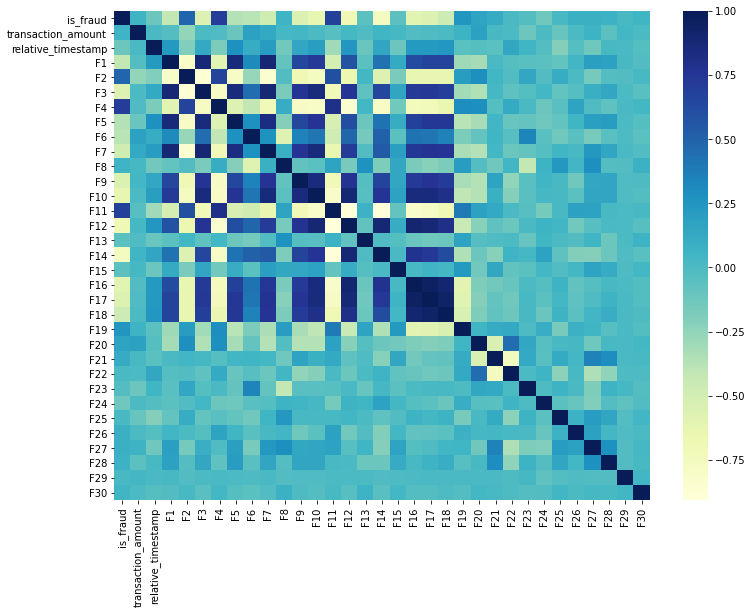

In [11]:
# plot correlation matrix on equally distributed set
correlation_matrix = df_sample.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, cmap = 'YlGnBu')
plt.show()

In [12]:
# so we have highly positive and negative correlated features 
corr_features = correlation_matrix['is_fraud'][abs(correlation_matrix['is_fraud'])>0.6]
corr_features

is_fraud    1.000000
F4          0.707744
F10        -0.627315
F11         0.685761
F12        -0.682999
F14        -0.750775
Name: is_fraud, dtype: float64

In [13]:
print(corr_features.index)

Index(['is_fraud', 'F4', 'F10', 'F11', 'F12', 'F14'], dtype='object')


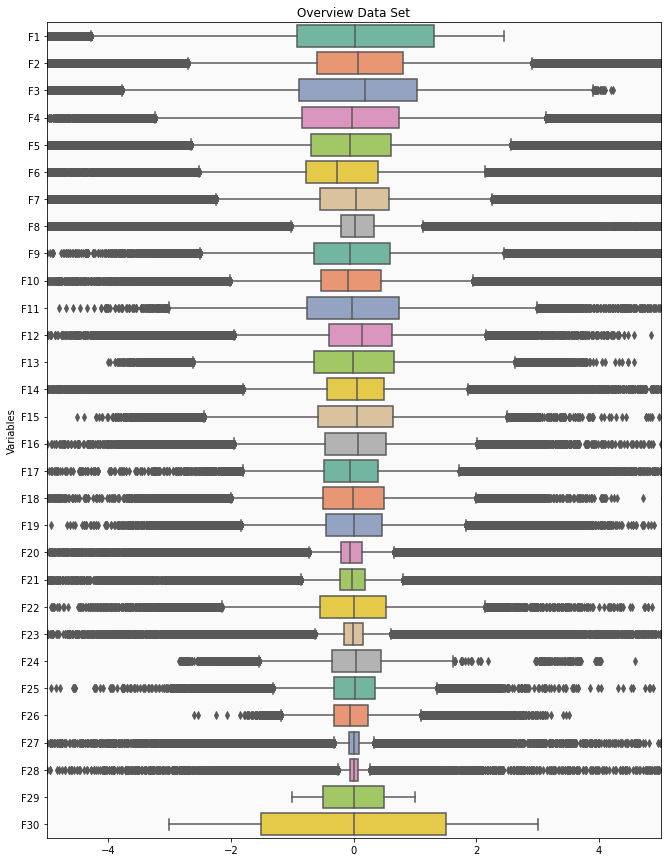

In [14]:
# plt.style.use('ggplot') # Using ggplot2 style visuals 
f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-5, 5))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df.drop(columns=['transaction_amount', 'is_fraud', 'relative_timestamp']), 
  orient = 'h', 
  palette = 'Set2')